In [1]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
import Tools as tl
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell

In [2]:
zro2 = read_vasp('Structure/POSCAR')

In [3]:
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


(<Axes:>, <Axes:>, <Axes:>)

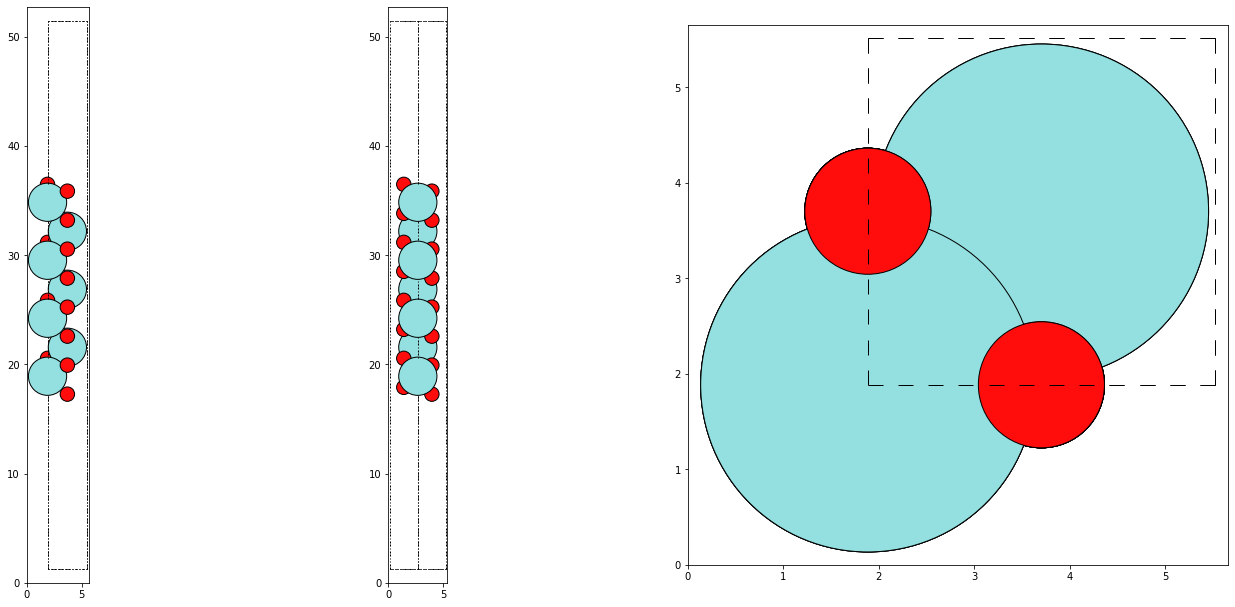

In [4]:
tl.plotviews(ZrO2001Oterm[0])

### · Creo Celda 2x2

In [5]:
ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]

In [6]:
from ase.build import sort

In [7]:
ZrO2001Oterm_2x2 = [sort(thissurface.copy()) for thissurface in ZrO2001Oterm_2x2_unsorted]

(<Axes:>, <Axes:>, <Axes:>)

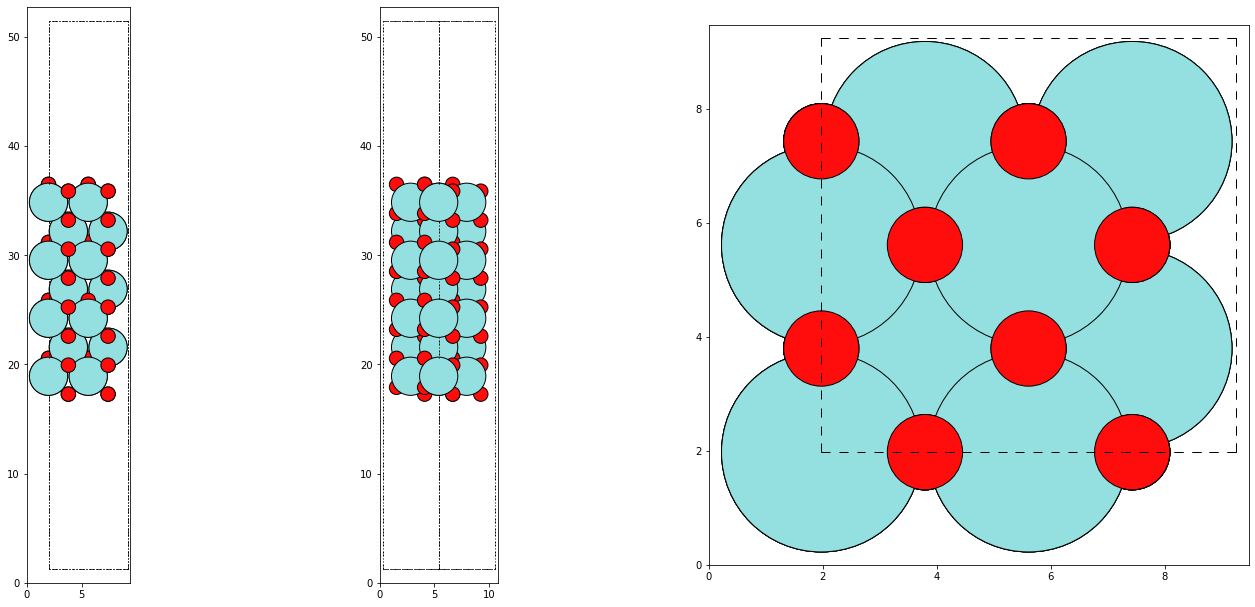

In [8]:
tl.plotviews(ZrO2001Oterm_2x2[0])

## Creo sitios 'hollow' - Puede hacerse un for cuando funcione bien

In [9]:
SitesZrO2 = []
title=['hollow']
tl.get_adsite(ZrO2001Oterm_2x2[0], site='hollow', face='top')
SitesZrO2.append(tl.make_adstruc(ZrO2001Oterm_2x2[0], 'RotBotTop', theface='top', thesite='hollow'))
title.append('top')
tl.get_adsite(ZrO2001Oterm_2x2[0], site='top', face='top')
SitesZrO2.append(tl.make_adstruc(ZrO2001Oterm_2x2[0], 'RotBotTop', theface='top', thesite='top'))

title.append('bridge')
tl.get_adsite(ZrO2001Oterm_2x2[0], site='bridge', face='top')
SitesZrO2.append(tl.make_adstruc(ZrO2001Oterm_2x2[0], 'RotBotTop', theface='top', thesite='bridge'))


# ahi tenes el for cantado

Text(0.5, 1.0, 'bridge')

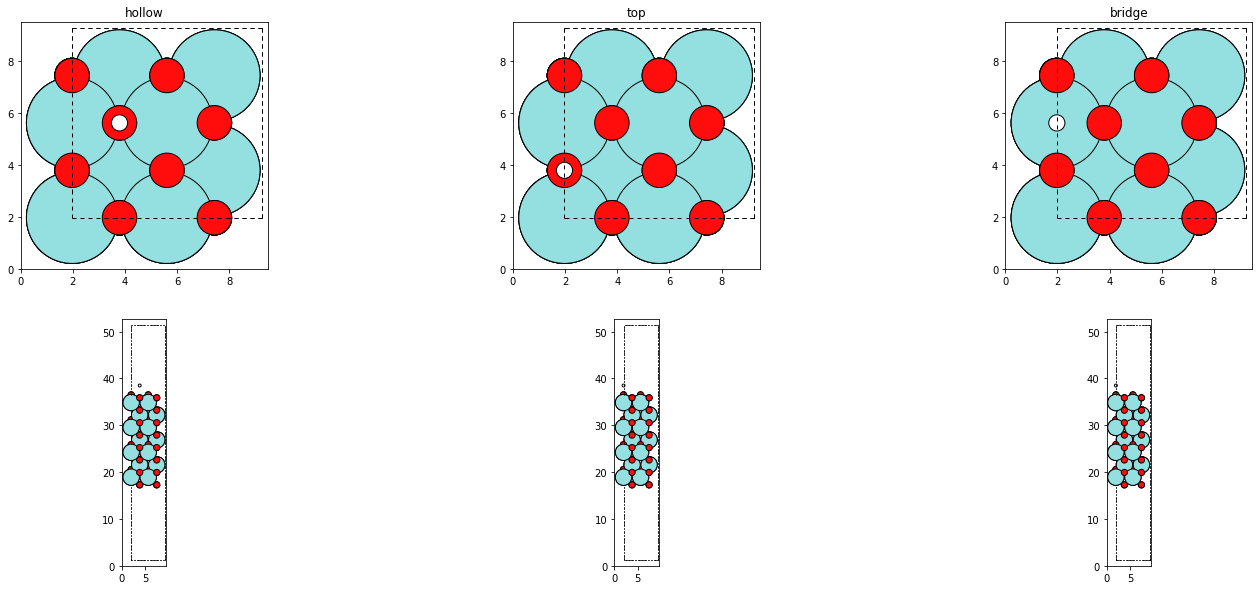

In [10]:
fig, ax = plt.subplots(2, 3)
plot_atoms(SitesZrO2[0], ax=ax[0,0])
plot_atoms(SitesZrO2[0], ax=ax[1,0], rotation='-90x')
ax[0,0].set_title(title[0])
plot_atoms(SitesZrO2[1], ax=ax[0,1])
plot_atoms(SitesZrO2[1], ax=ax[1,1], rotation='-90x')
ax[0,1].set_title(title[1])
plot_atoms(SitesZrO2[2], ax=ax[0,2])
plot_atoms(SitesZrO2[2], ax=ax[1,2], rotation='-90x')
ax[0,2].set_title(title[2])
#plot_atoms(SitesZrO2[4], ax=ax[3])

lo que quisiera es que el hollow este en el sitio que tiene el hueco abajo,

In [11]:
ZrO2001Oterm_2x2[0].info['adatom']

{'top': {'hollow': array([ 1.8170995 ,  3.63419899, 35.22092906]),
  'top': array([ 0.        ,  1.8170995 , 35.22092906]),
  'bridge': array([ 0.        ,  3.63419899, 35.22092906])}}

In [12]:
from ase.geometry import get_layers

In [13]:
layer, height = get_layers(ZrO2001Oterm_2x2[0], (0,0,1), tolerance=0.7)

In [14]:
layer

array([ 0,  2,  2,  0,  4,  6,  6,  4,  8, 10, 10,  8, 12, 14, 14, 12,  0,
        2,  2,  0,  4,  6,  6,  4,  8, 10, 10,  8, 12, 14, 14, 12,  0,  2,
        2,  0,  4,  6,  6,  4,  8, 10, 10,  8, 12, 14, 14, 12,  0,  2,  2,
        0,  4,  6,  6,  4,  8, 10, 10,  8, 12, 14, 14, 12,  1,  3,  5,  7,
        9, 11, 13,  1,  3,  5,  7,  9, 11, 13,  1,  3,  5,  7,  9, 11, 13,
        1,  3,  5,  7,  9, 11, 13], dtype=int32)

In [15]:
[layer == 13]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False,  True])]

In [16]:
height

array([16.01583411, 17.6545954 , 18.67042951, 20.30919079, 21.3250249 ,
       22.96378619, 23.9796203 , 25.61838158, 26.6342157 , 28.27297698,
       29.28881109, 30.92757238, 31.94340649, 33.58216777, 34.59800188])

In [17]:
h_sitios = max(height)

In [18]:
h_sitios

34.59800188409665

# Encontramos coordenadas del hollow1

In [19]:
hollow1 = ZrO2001Oterm_2x2[0].positions[layer == 13].mean(axis=0)[:2]

In [20]:
hollow1 = np.append(hollow1, h_sitios)

In [21]:
hollow1

array([ 1.8170995 ,  1.8170995 , 34.59800188])

In [22]:
ZrO2001Oterm_2x2[0].info = {'adatom': {'top': {'hollow1': hollow1}}}

In [23]:
ZrO2001Oterm_2x2[0].info

{'adatom': {'top': {'hollow1': array([ 1.8170995 ,  1.8170995 , 34.59800188])}}}

In [24]:
onhollow1 = tl.make_adstruc(ZrO2001Oterm_2x2[0], 'hollow1', thesite='hollow1', theface='top',)

In [25]:
onhollow1

Atoms(symbols='HO64Zr28', pbc=[True, True, False], cell=[7.268397980708341, 7.268397980708341, 50.22092905883963])

(<Axes:>, <Axes:>, <Axes:>)

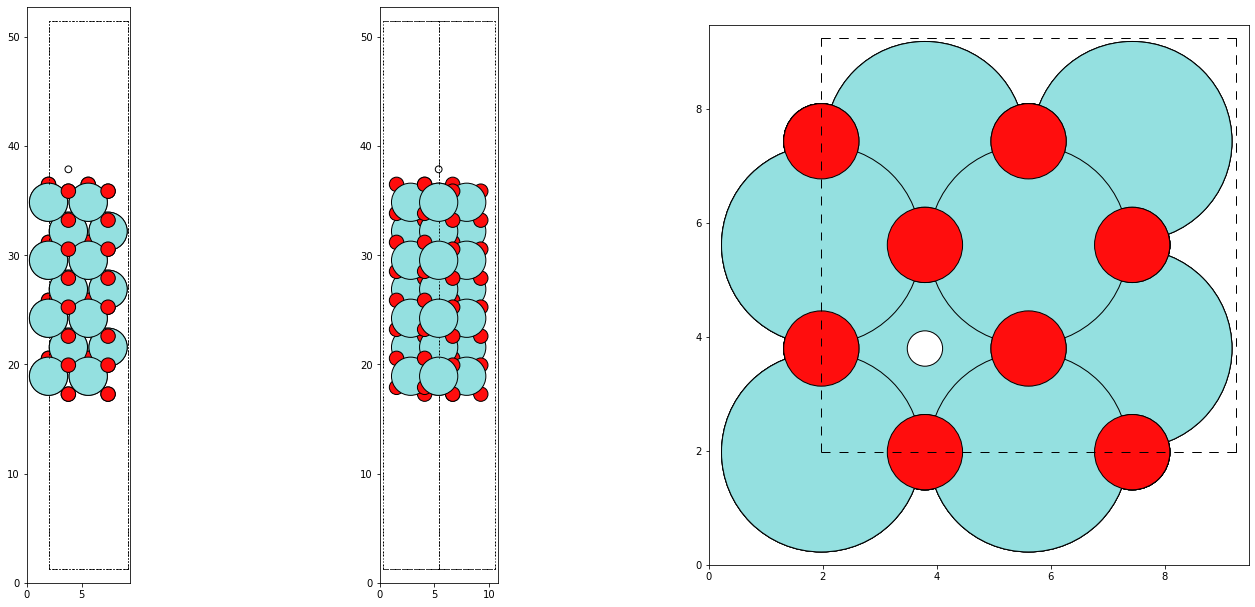

In [26]:
tl.plotviews(onhollow1)

Ya esta subido a github ! descargar con:
```
git fetch upstream
git checkout -b inspect_actual_sites upstream/inspect_actual_sites
```

# Encontramos coordenadas del hollow2

In [27]:
hollow2 = ZrO2001Oterm_2x2[0].positions[layer == 13][0][:2]

In [28]:
hollow2

array([0., 0.])

In [29]:
hollow2 = np.append(hollow2, h_sitios)

In [30]:
hollow2

array([ 0.        ,  0.        , 34.59800188])

In [31]:
ZrO2001Oterm_2x2[0].info = {'adatom': {'top': {'hollow2': hollow2}}}

In [32]:
ZrO2001Oterm_2x2[0].info

{'adatom': {'top': {'hollow2': array([ 0.        ,  0.        , 34.59800188])}}}

In [33]:
onhollow2 = tl.make_adstruc(ZrO2001Oterm_2x2[0], 'hollow2', thesite='hollow2', theface='top',)

(<Axes:>, <Axes:>, <Axes:>)

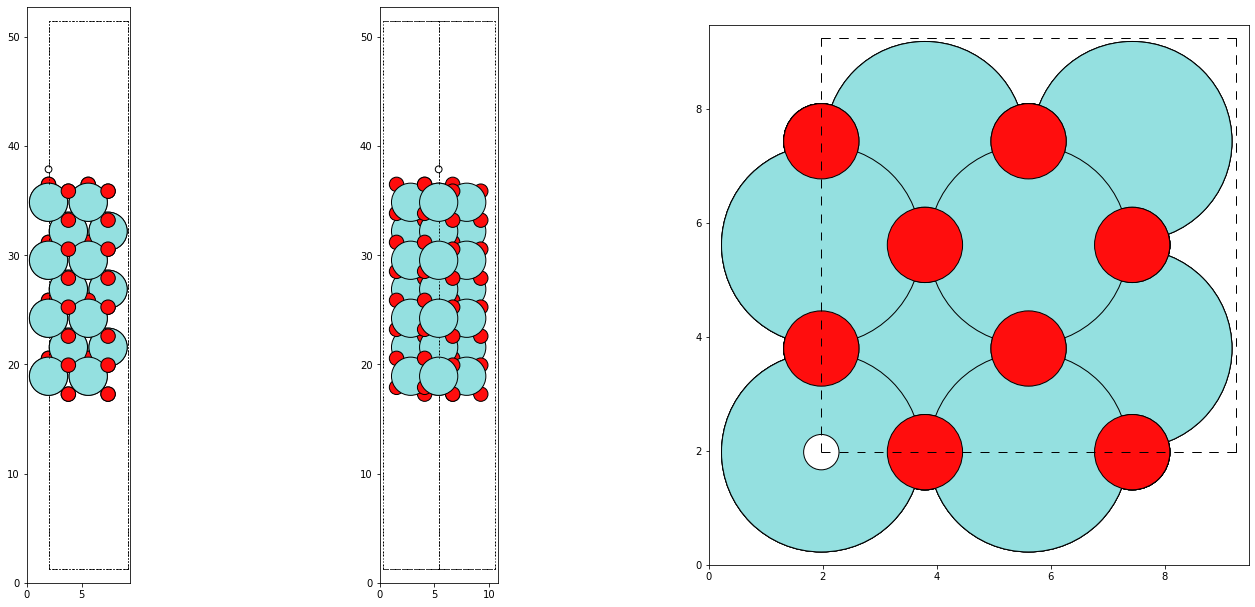

In [34]:
tl.plotviews(onhollow2)

# Encontramos (de suerte) coordenadas del bridge

In [35]:
bridge = ZrO2001Oterm_2x2[0].positions[layer == 14].mean(axis=0)[:2]

In [36]:
bridge = np.append(bridge, h_sitios)

In [37]:
ZrO2001Oterm_2x2[0].info = {'adatom': {'top': {'bridge': bridge}}}

In [38]:
onbridge = tl.make_adstruc(ZrO2001Oterm_2x2[0], 'bridge', thesite='bridge', theface='top',)

(<Axes:>, <Axes:>, <Axes:>)

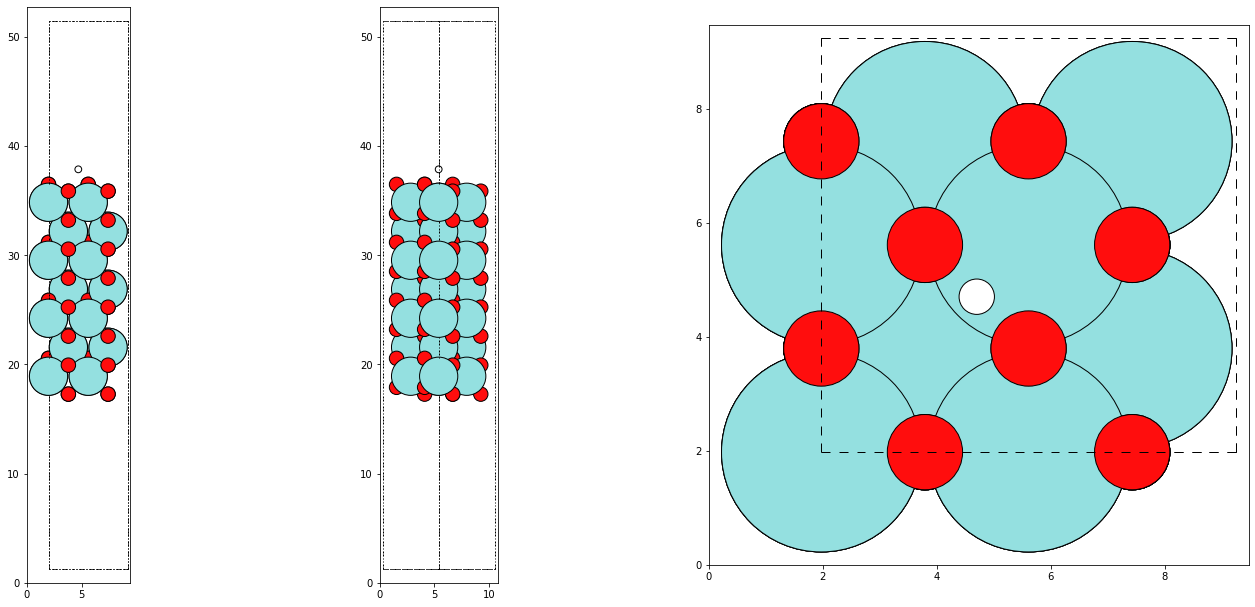

In [39]:
tl.plotviews(onbridge)